# Problem statement:

Cardiovascular diseases are the leading cause of death globally. 

It is therefore necessary to identify the causes and develop a system to predict heart attacks in an effective manner. 

The data below has the information about the factors that might have an impact on cardiovascular health. 

### Task to be performed:

1.	Preliminary analysis:

    a.	Perform preliminary data inspection and report the findings on the structure of the data, missing values, duplicates, etc.

    b.	Based on these findings, remove duplicates (if any) and treat missing values using an appropriate strategy

    

2.	Prepare a report about the data explaining the distribution of the disease and the related factors using the steps listed below:

    a.	Get a preliminary statistical summary of the data and explore the measures of central tendencies and spread of the data

    b.	Identify the data variables which are categorical and describe and explore these variables using the appropriate tools, such as count plot 

    c.	Study the occurrence of CVD across the Age category

    d.	Study the composition of all patients with respect to the Sex category

    e.	Study if one can detect heart attacks based on anomalies in the resting blood pressure (trestbps) of a patient
    
    f.	Describe the relationship between cholesterol levels and a target variable

    g.	State what relationship exists between peak exercising and the occurrence of a heart attack

    h.	Check if thalassemia is a major cause of CVD

    i.	List how the other factors determine the occurrence of CVD

    j.	Use a pair plot to understand the relationship between all the given variables


3.	Build a baseline model to predict the risk of a heart attack using:

   - logistic regression

   - random forest and

   - explore the results while using correlation analysis

   - and logistic regression (leveraging standard error and p-values from statsmodels) for feature selection


In [245]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [246]:
data = pd.read_excel('Cardiovascular_diseases_dataset.xlsx')

In [247]:
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [249]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# 1.	Preliminary analysis:

    a.	Perform preliminary data inspection and report the findings on the structure of the data, missing values, duplicates, etc.
    

    b.	Based on these findings, remove duplicates (if any) and treat missing values using an appropriate strategy

In [250]:
data.drop_duplicates(inplace=True)

In [251]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


There was just one duplicate there

In [252]:
#Identify how many values are missing from each columns -or-
# How many NaNs in each column

data.isna().sum()  

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There is not any null values in the dataset

In [253]:
data.shape

(302, 14)

### 2.	Prepare a report about the data explaining the distribution of the disease and the related factors using the steps listed below:

  a.	Get a preliminary statistical summary of the data and explore the measures of central tendencies and spread of the data

In [254]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


 b.	Identify the data variables which are categorical and describe and explore these variables using the appropriate tools, such as count plot 


In [255]:
data['target'].value_counts()

target
1    164
0    138
Name: count, dtype: int64

In [16]:
# The target column consists of 1s and 0s.

# 1 represents that the patient is diagnosed with a cardiovascular disease 
# 0 represents that the patients is not diagnosed with a cardiovascular disease
# 164 patients have cardiovascular disease, and 138 don’t.

<Axes: xlabel='target', ylabel='count'>

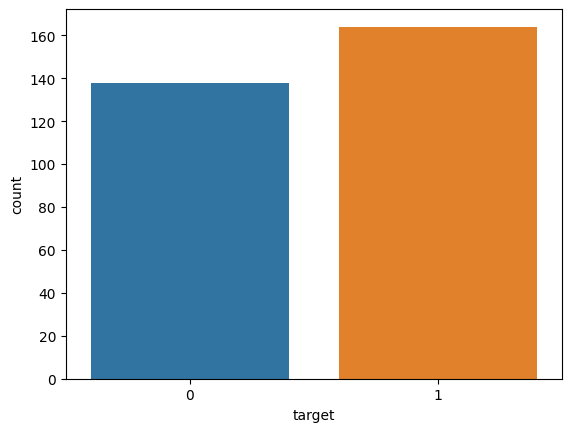

In [256]:
sns.countplot(x=data['target'])

In [230]:
print(data.apply(lambda col: col.unique()))

age         [63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 5...
sex                                                    [1, 0]
cp                                               [3, 2, 1, 0]
trestbps    [145, 130, 120, 140, 172, 150, 110, 135, 160, ...
chol        [233, 250, 204, 236, 354, 192, 294, 263, 199, ...
fbs                                                    [1, 0]
restecg                                             [0, 1, 2]
thalach     [150, 187, 172, 178, 163, 148, 153, 173, 162, ...
exang                                                  [0, 1]
oldpeak     [2.3, 3.5, 1.4, 0.8, 0.6, 0.4, 1.3, 0.0, 0.5, ...
slope                                               [0, 2, 1]
ca                                            [0, 2, 1, 3, 4]
thal                                             [1, 2, 3, 0]
target                                                 [1, 0]
dtype: object


  c.	Study the occurrence of CVD across the Age category

<Axes: xlabel='age', ylabel='count'>

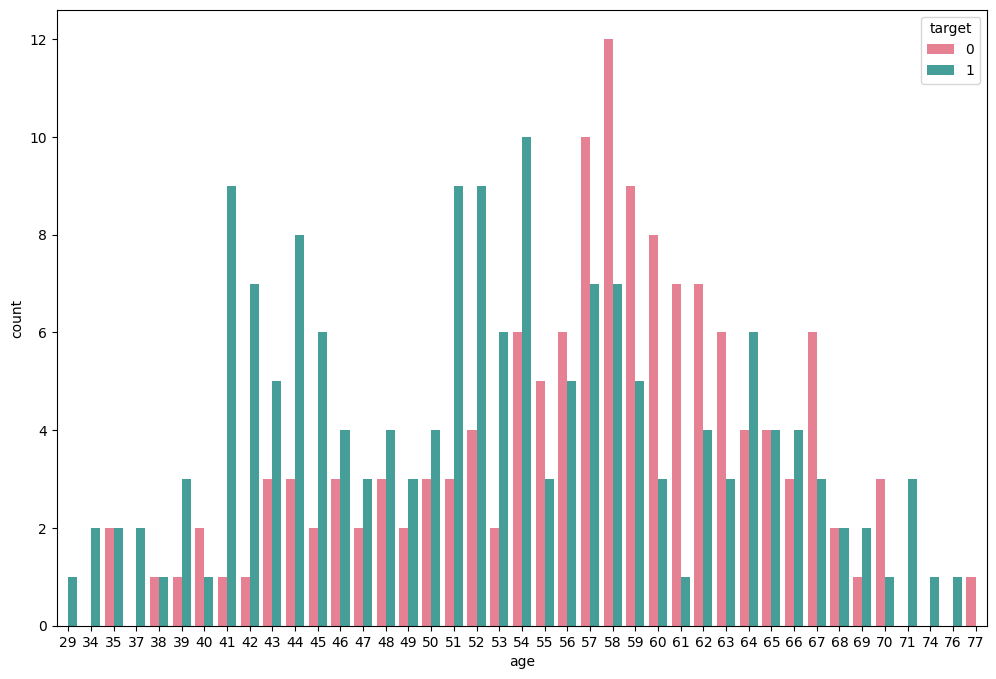

In [146]:
#figure_cvd = (15,10)
fig, axs = plt.subplots(figsize = (12,8))
sns.countplot(x = 'age', hue='target', data = data, palette='husl', ax=axs)

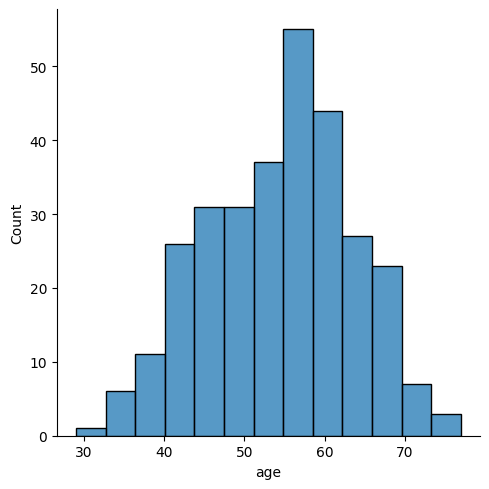

In [147]:
sns.displot(data['age'])

  d.	Study the composition of all patients with respect to the Sex category

<Axes: xlabel='sex', ylabel='count'>

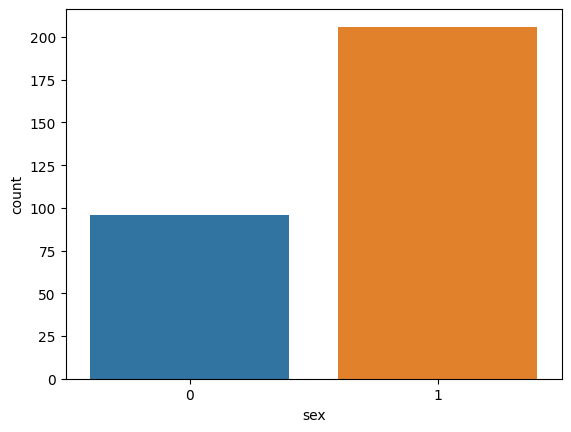

In [148]:

sns.countplot(x=data['sex'])

1 = men

0 = women

There are significantly more men in the data than women

<Axes: xlabel='sex', ylabel='age'>

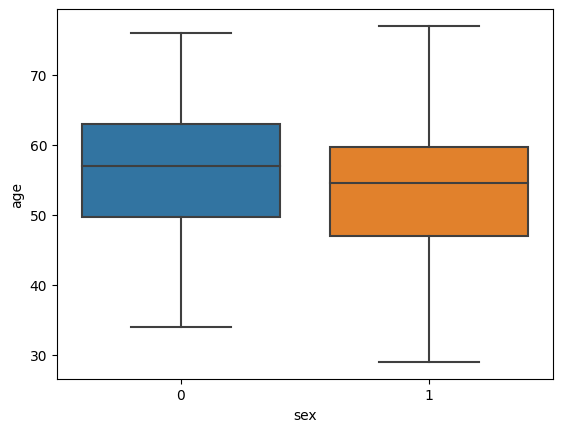

In [149]:
# A box plot to show the ranges of ages of the women and men in the data

sns.boxplot(data = data, x = 'sex', y = 'age')

In [257]:
hist_df = data.groupby('target')

In [258]:
hist_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
166,67,1,0,120,229,0,0,129,1,2.6,1,2,3,0
167,62,0,0,140,268,0,0,160,0,3.6,0,2,2,0
168,63,1,0,130,254,0,0,147,0,1.4,1,1,3,0
169,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0


e. Study if one can detect heart attacks based on anomalies in the resting blood pressure (trestbps) of a patient

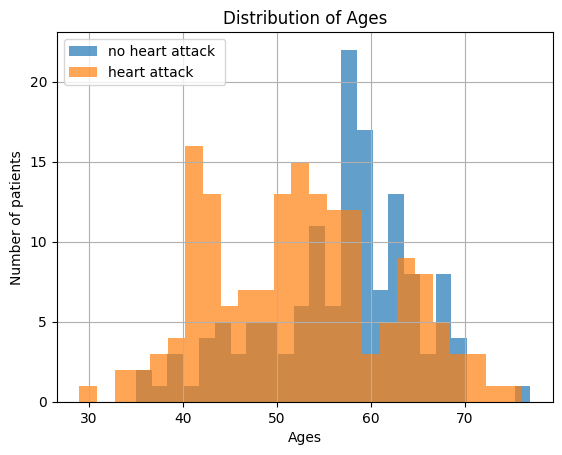

In [152]:
# A distribution of the ages of patients that suffered a heart attack and the ones have not suffered a heart attack

hist_df['age'].hist(bins=25, alpha=0.7)
plt.title('Distribution of Ages')
plt.xlabel('Ages')
plt.ylabel('Number of patients')
plt.legend(('no heart attack ', 'heart attack'), loc = 'upper left')
plt.show()

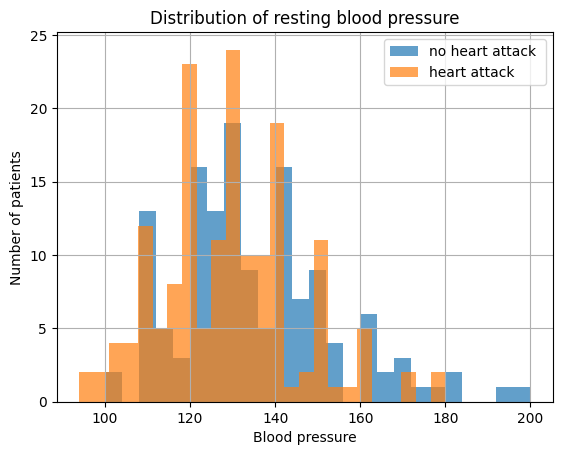

In [153]:
# e. Study if one can detect heart attacks based on anomalies in the resting blood pressure (trestbps) of a patient

hist_df['trestbps'].hist(bins=25, alpha=0.7)
plt.title('Distribution of resting blood pressure')
plt.xlabel('Blood pressure')
plt.ylabel('Number of patients')
plt.legend(('no heart attack ', 'heart attack'), loc = 'upper right')
plt.show()

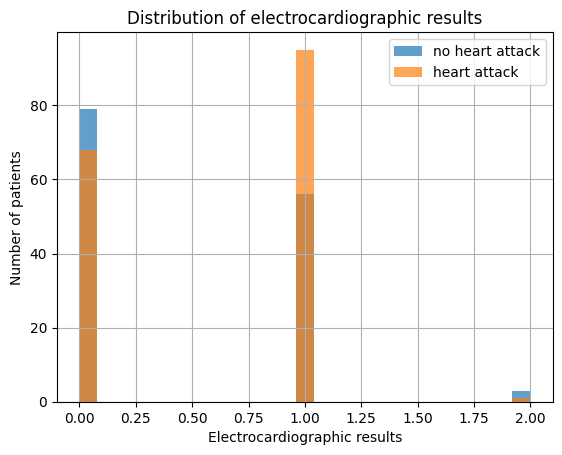

In [154]:
#  Study if one can detect heart attacks based on anomalies in the resting electrocardiographic (restecg) of a patient

hist_df['restecg'].hist(bins = 25, alpha = 0.7)
plt.title('Distribution of electrocardiographic results') 
plt.xlabel('Electrocardiographic results')
plt.ylabel('Number of patients') 
plt.legend(('no heart attack', 'heart attack'), loc = 'upper right')
plt.show()

g.	State what relationship exists between peak exercising and the occurrence of a heart attack

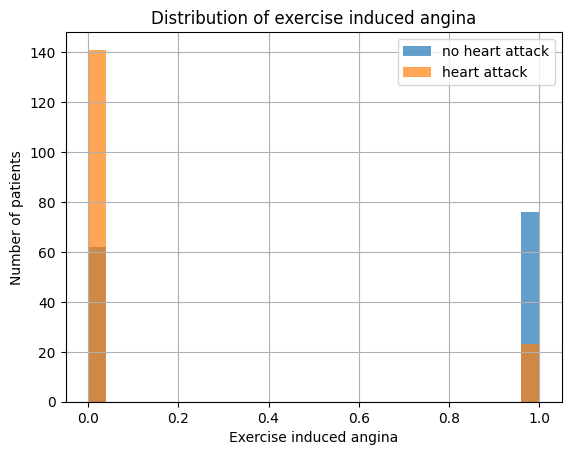

In [155]:
hist_df['exang'].hist(bins = 25, alpha = 0.7)
plt.title('Distribution of exercise induced angina') 
plt.xlabel('Exercise induced angina') 
plt.ylabel('Number of patients')
plt.legend(('no heart attack', 'heart attack'), loc = 'upper right')
plt.show()

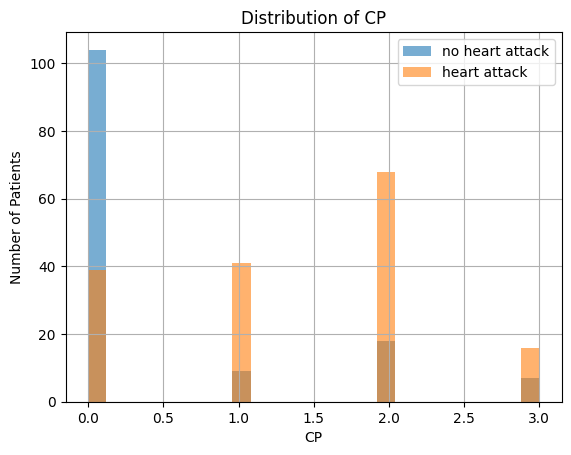

In [156]:
hist_df['cp'].hist(bins = 25, alpha=0.6) 
plt.title('Distribution of CP')
plt.xlabel('CP')
plt.ylabel('Number of Patients') 
plt.legend(('no heart attack', 'heart attack'))
plt.show()

 f.	Describe the relationship between cholesterol levels and a target variable

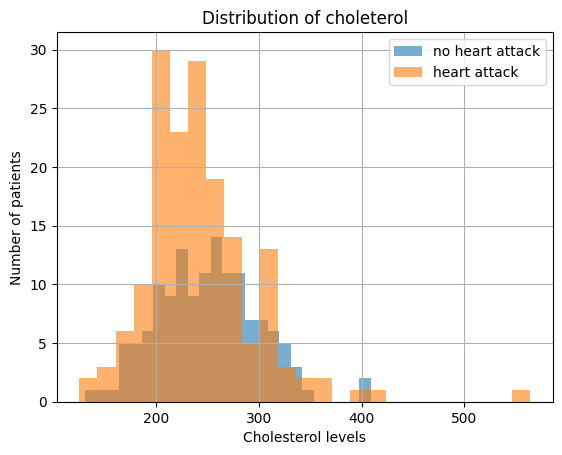

In [157]:

hist_df['chol'].hist(bins = 25, alpha=0.6)
plt.title('Distribution of choleterol')
plt.xlabel('Cholesterol levels')
plt.ylabel('Number of patients') 
plt.legend(('no heart attack', 'heart attack'), loc = 'upper right') 
plt.show()

h.	Check if thalassemia is a major cause of CVD

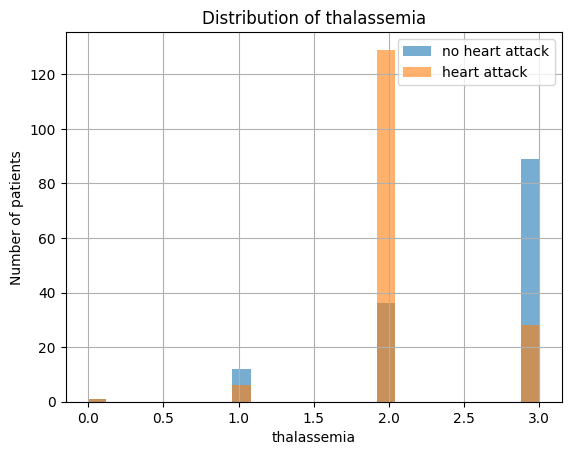

In [158]:
hist_df['thal'].hist(bins = 25, alpha=0.6) 
plt.title('Distribution of thalassemia') 
plt.xlabel('thalassemia')
plt.ylabel('Number of patients')
plt.legend(('no heart attack', 'heart attack'), loc = 'upper right')
plt.show()

In [259]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


3.	Build a baseline model to predict the risk of a heart attack using:

### logistic regression

In [54]:
#Preparing Data

In [303]:
#Preparing Data

df2 = data.copy()

def get_gender(sex):

   if sex == 0:
    return 'female'
   else:
    return 'male'

#df2['sex'] = df2['sex'].apply(get_gender)

def get_cp_category(cp_value):
  if cp_value == 0:
    cp_string = 'typical'
  elif cp_value == 1:
    cp_string = 'atypical'
  elif cp_value == 2:
    cp_string = 'non_anginal' 
  elif cp_value == 3:
    cp_string = 'asmptomatic'
  return(cp_string) 

#df2['target'] = df2['target'].apply(get_cp_category)

In [304]:
df_subset = df2[['sex', 'cp']]

In [305]:
df_subset.head()

,sex,cp
0,1,3
1,1,2
2,0,1
3,1,1
4,0,0


In [306]:
import warnings
warnings.filterwarnings('ignore')

df_subset['sex']= df_subset.sex.map(lambda x: get_gender(x))
df_subset['cp']= df_subset.cp.map(lambda x: get_cp_category(x))

In [307]:
df_subset.head()

,sex,cp
0,male,asmptomatic
1,male,non_anginal
2,female,atypical
3,male,atypical
4,female,typical


In [308]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)
ohe_sex = ohe.fit_transform(np.array(df_subset['sex']).reshape(-1,1))
ohe_cp = ohe.fit_transform(np.array(df_subset['cp']).reshape(-1,1))


In [309]:
features_sex_cp = np.concatenate([ohe_sex, ohe_cp], axis = 1)


In [310]:
features_sex_cp


array([[0., 1., 1., 0., 0., 0.],
       [0., 1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0., 0.]])

In [311]:
dum_df = pd.get_dummies(df_subset[['sex', 'cp']], dtype= int)
dum_df.head()

,sex_female,sex_male,cp_asmptomatic,cp_atypical,cp_non_anginal,cp_typical
0,0,1,1,0,0,0
1,0,1,0,0,1,0
2,1,0,0,1,0,0
3,0,1,0,1,0,0
4,1,0,0,0,0,1


In [312]:
dum_df = dum_df.drop(['sex_female'], axis=1)

In [313]:
df3 = pd.concat([df2,dum_df], axis=1)
df3.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,sex_male,cp_asmptomatic,cp_atypical,cp_non_anginal,cp_typical
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1,1,0,0,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,1,0,0,1,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,0,1,0,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,1,0,1,0,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0,0,0,0,1


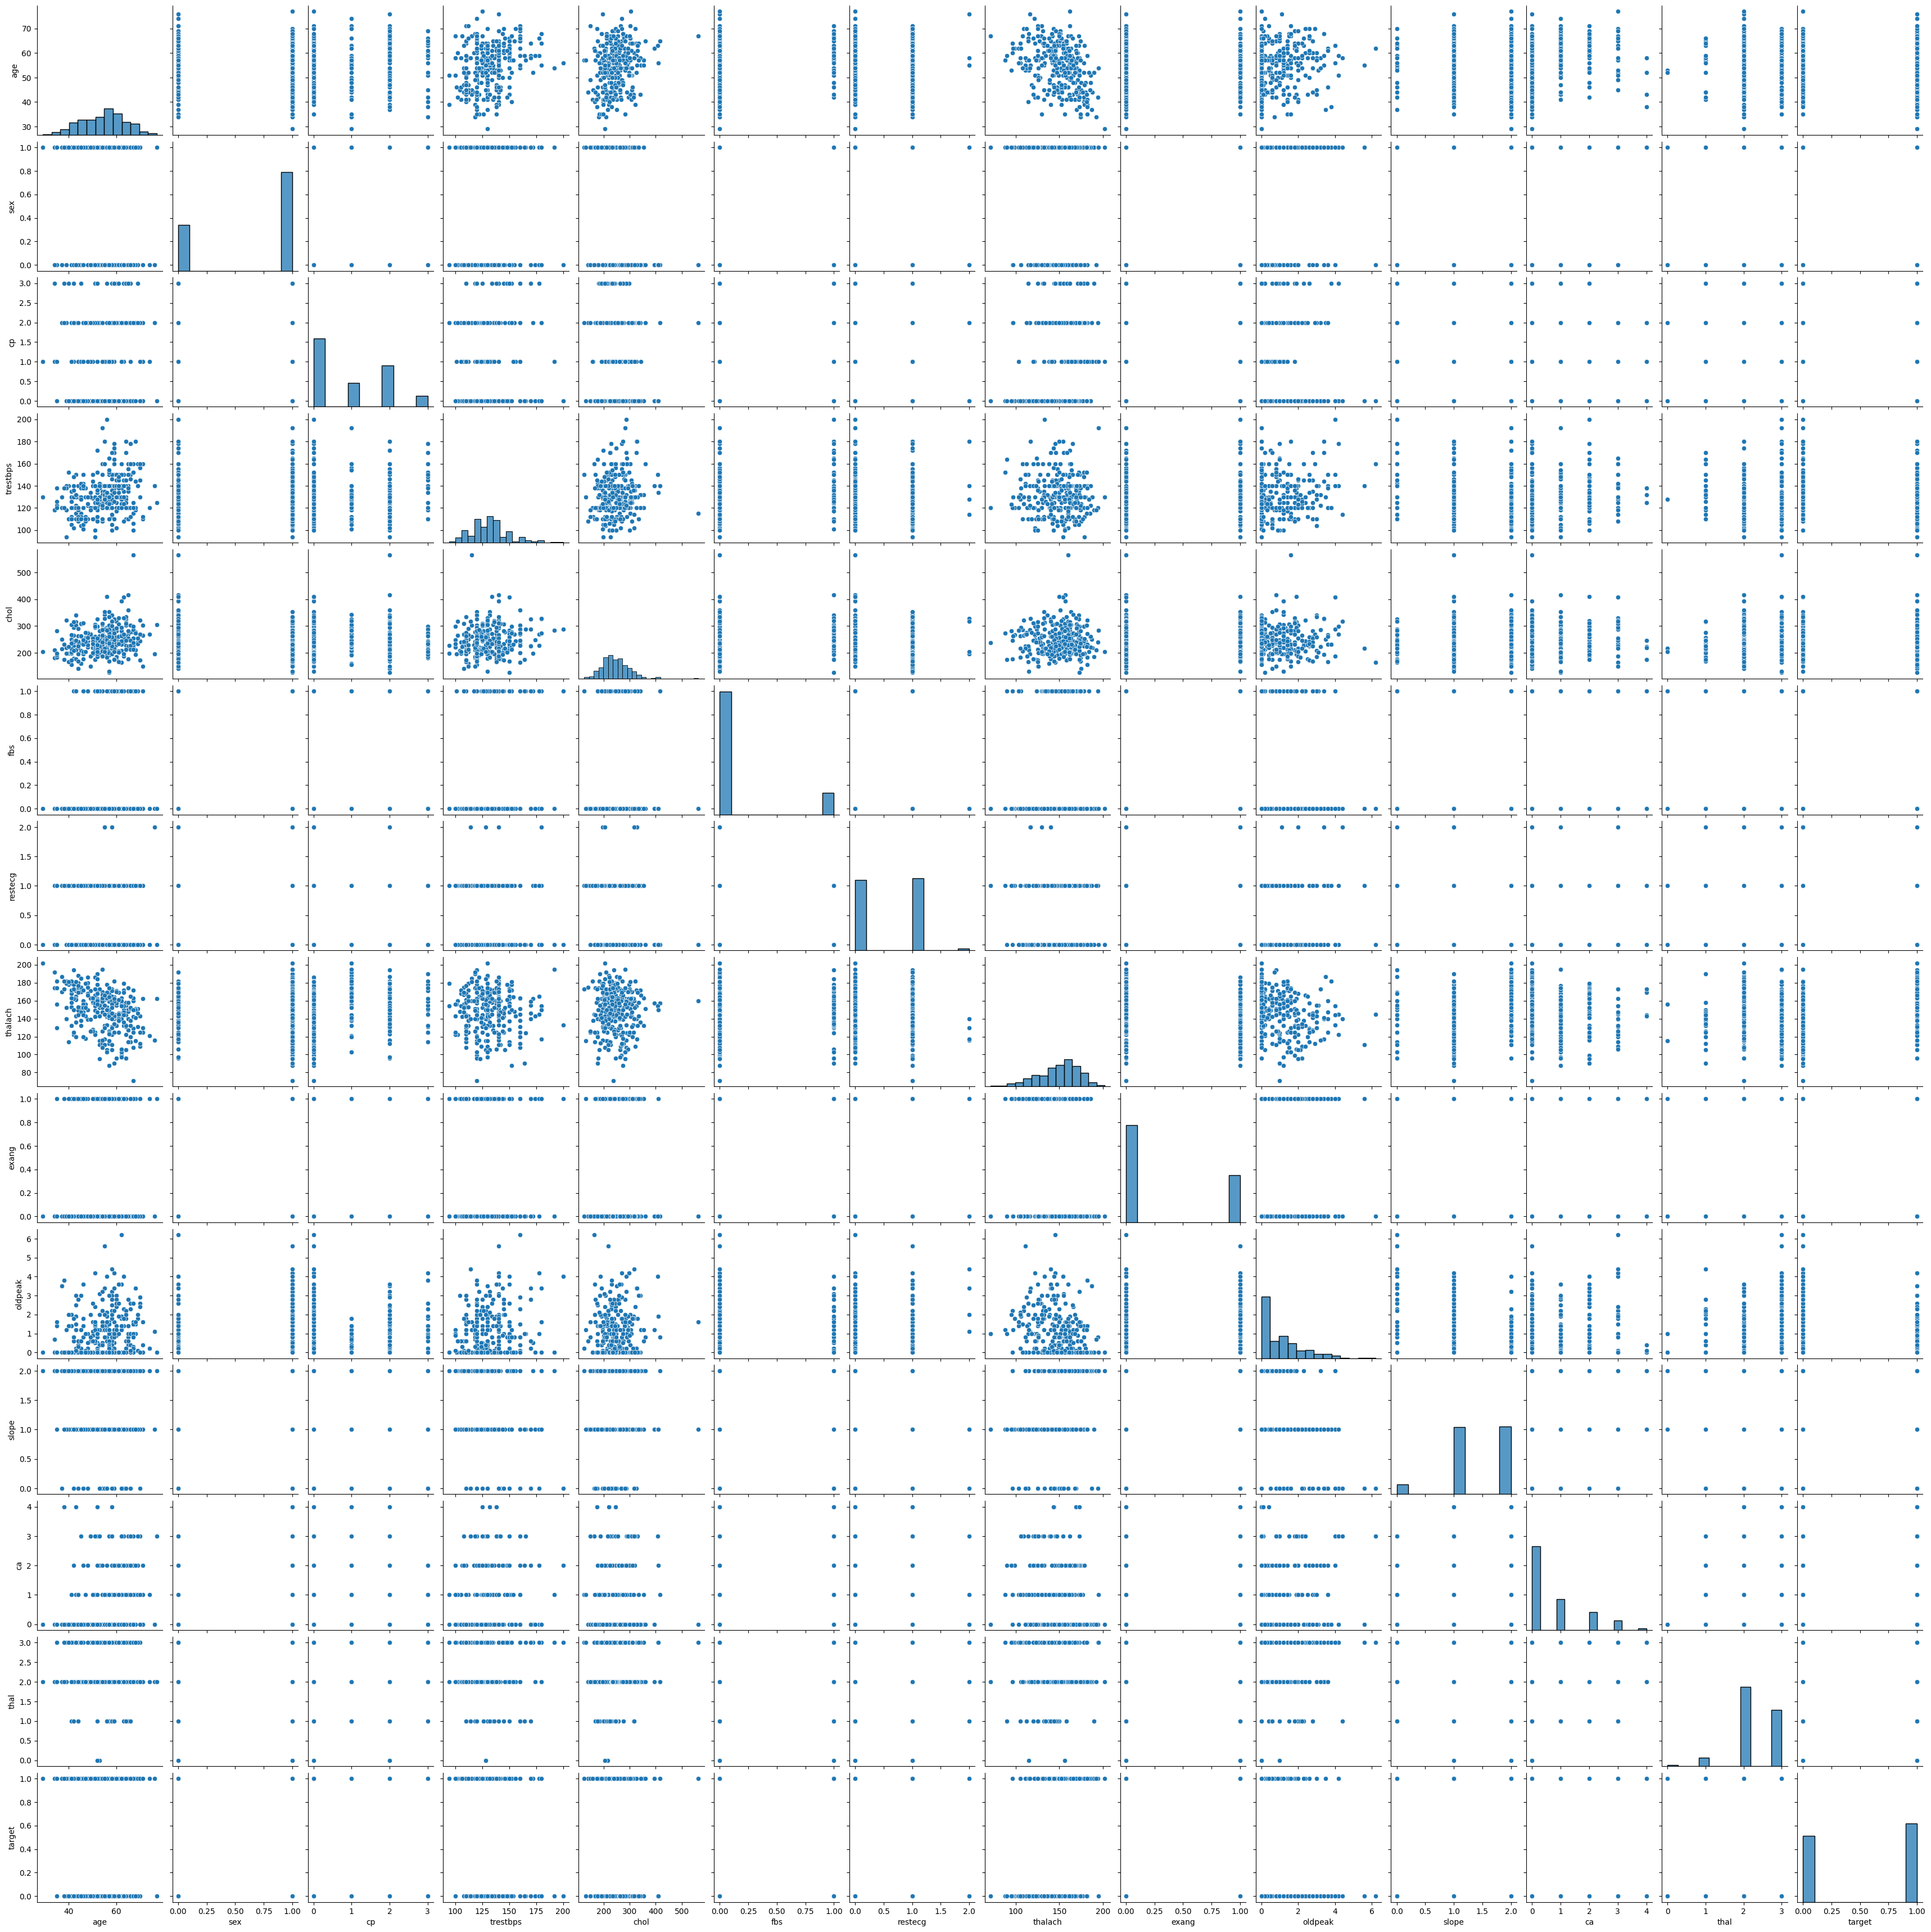

In [171]:
sns.pairplot(data)

In [314]:

features = data.iloc[:,:-1].values
label = data.iloc[:,-1].values

In [348]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [347]:
features

array([[63.,  1.,  3., ...,  0.,  0.,  1.],
       [37.,  1.,  2., ...,  0.,  0.,  2.],
       [41.,  0.,  1., ...,  2.,  0.,  2.],
       ...,
       [68.,  1.,  0., ...,  1.,  2.,  3.],
       [57.,  1.,  0., ...,  1.,  1.,  3.],
       [57.,  0.,  1., ...,  1.,  1.,  2.]])

In [315]:
#spliting Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features,
                                                    label,
                                                    test_size=0.2,
                                                    random_state=1)

In [316]:
# I used the normalization way of feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train= sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [317]:
# Random Forest Classifier, it’s a supervised machine learning algorithm.

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100,max_depth=3)
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=3)

In [318]:

print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.8879668049792531
0.7704918032786885


In [319]:
CL = 0.7
for i in range(1, 100):
    X_train,X_test,y_train,y_test = train_test_split(features,
                                                     label,
                                                     test_size=0.2,
                                                     random_state=i)
    modelRF = RandomForestClassifier(max_depth=2)
    modelRF.fit(X_train, y_train)
    
    train_score = modelRF.score(X_train,y_train)
    test_score = modelRF.score(X_test,y_test)
    #print("Test Score: " ,test_score ,", Train Score: " , train_score , ", random_state:", i )
    
    if test_score > train_score and test_score > CL:
       # print(i)
        print("Test Score {}, Train Score {}, Random_state {}".format(test_score,train_score,i))

Test Score 0.8688524590163934, Train Score 0.8589211618257261, Random_state 3
Test Score 0.8688524590163934, Train Score 0.8506224066390041, Random_state 4
Test Score 0.8688524590163934, Train Score 0.8464730290456431, Random_state 8
Test Score 0.9016393442622951, Train Score 0.8589211618257261, Random_state 9
Test Score 0.8688524590163934, Train Score 0.8423236514522822, Random_state 24
Test Score 0.8852459016393442, Train Score 0.8547717842323651, Random_state 26
Test Score 0.9180327868852459, Train Score 0.8381742738589212, Random_state 29
Test Score 0.8688524590163934, Train Score 0.8464730290456431, Random_state 33
Test Score 0.8524590163934426, Train Score 0.8506224066390041, Random_state 34
Test Score 0.8688524590163934, Train Score 0.8464730290456431, Random_state 38
Test Score 0.9180327868852459, Train Score 0.8423236514522822, Random_state 40
Test Score 0.8852459016393442, Train Score 0.8755186721991701, Random_state 42
Test Score 0.8852459016393442, Train Score 0.84647302904

In [320]:
X_train, X_test, y_train, y_test = train_test_split(features,
                                                    label,
                                                    test_size=0.2,
                                                    random_state=40)

In [321]:
sc = StandardScaler()
X_train= sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [322]:
model = RandomForestClassifier(n_estimators=100,max_depth=3)
model.fit(X_train,y_train)
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.8630705394190872
0.9180327868852459


## Logistic Regression

In [323]:
from sklearn.linear_model import LogisticRegression

for i in range(1,401):
    X_train,X_test,y_train,y_test = train_test_split(features,label,test_size=0.2,random_state=i)
    model = LogisticRegression()
    model.fit(X_train,y_train)
    
    train_score = model.score(X_train,y_train)
    test_score = model.score(X_test,y_test)
    
    if test_score > train_score:
        print("Test {} Train {} RS {}".format(test_score,train_score,i))

Test 0.8852459016393442 Train 0.8381742738589212 RS 2
Test 0.8688524590163934 Train 0.8547717842323651 RS 3
Test 0.8524590163934426 Train 0.8506224066390041 RS 4
Test 0.8688524590163934 Train 0.8506224066390041 RS 7
Test 0.8852459016393442 Train 0.8506224066390041 RS 8
Test 0.9344262295081968 Train 0.8257261410788381 RS 9
Test 0.8688524590163934 Train 0.8630705394190872 RS 12
Test 0.8688524590163934 Train 0.8506224066390041 RS 18
Test 0.8524590163934426 Train 0.8506224066390041 RS 21
Test 0.8688524590163934 Train 0.8630705394190872 RS 23
Test 0.8852459016393442 Train 0.8589211618257261 RS 24
Test 0.8852459016393442 Train 0.8547717842323651 RS 26
Test 0.9180327868852459 Train 0.8298755186721992 RS 29
Test 0.8688524590163934 Train 0.8589211618257261 RS 38
Test 0.9016393442622951 Train 0.8464730290456431 RS 40
Test 0.8852459016393442 Train 0.8381742738589212 RS 43
Test 0.8688524590163934 Train 0.8672199170124482 RS 44
Test 0.8688524590163934 Train 0.8340248962655602 RS 45
Test 0.868852459

In [324]:
X_train,X_test,y_train,y_test = train_test_split(features,label,test_size=0.2,random_state=321)
finalModel = LogisticRegression()
finalModel.fit(X_train,y_train)

LogisticRegression()

In [325]:
print(finalModel.score(X_train,y_train))
print(finalModel.score(X_test,y_test))

0.8423236514522822
0.9344262295081968


In [326]:
logistic_predictions = finalModel.predict(X_test)

In [327]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, logistic_predictions) 
cnf_matrix

array([[21,  3],
       [ 1, 36]])

Text(0.5, 427.9555555555555, 'Predicted label')

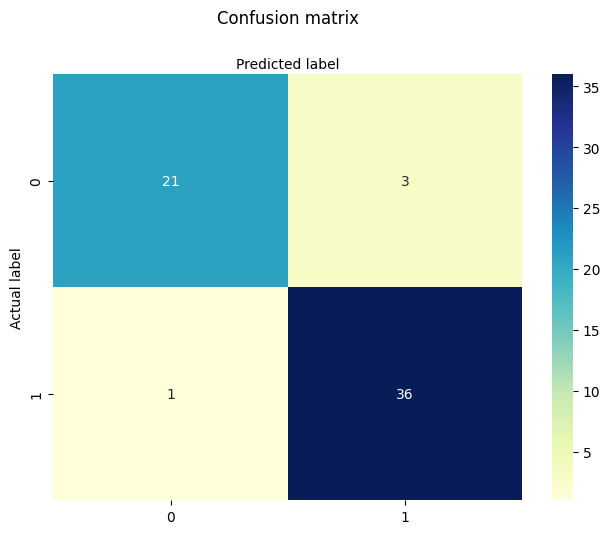

In [328]:
fig, ax = plt.subplots() 
sns.heatmap(cnf_matrix, annot = True,cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [329]:
print("Accuracy:",metrics.accuracy_score(y_test, logistic_predictions))
print("Precision:",metrics.precision_score(y_test, logistic_predictions))
print("Recall:",metrics.recall_score(y_test, logistic_predictions))

Accuracy: 0.9344262295081968
Precision: 0.9230769230769231
Recall: 0.972972972972973


In [331]:
X2 = sm.add_constant(X)
est = sm.OLS(label, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     23.88
Date:                Tue, 15 Aug 2023   Prob (F-statistic):           1.48e-38
Time:                        07:47:00   Log-Likelihood:                -107.62
No. Observations:                 302   AIC:                             243.2
Df Residuals:                     288   BIC:                             295.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8156      0.293      2.785      0.0

In [336]:
X = sm.add_constant(features)
model = sm.OLS(label, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     23.88
Date:                Tue, 15 Aug 2023   Prob (F-statistic):           1.48e-38
Time:                        07:49:39   Log-Likelihood:                -107.62
No. Observations:                 302   AIC:                             243.2
Df Residuals:                     288   BIC:                             295.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8156      0.293      2.785      0.006       0.239       1.392
x1            -0.0004      0.003     -0.145      0.885      -0.006       0.005
x2            -0.1965      0.047     -4.172      0.000      -0.289      -0.104
x3             0.1108      0.022      4.941      0.000       0.067       0.155
x4            -0.0021      0.001     -1.664      0.097      -0.005       0.000
x5            -0.0003      0.000     -0.773      0.440      -0.001       0.001
x6             0.0218      0.060      0.365      0.715      -0.096       0.139
x7             0.0478      0.040      1.197      0.232      -0.031       0.126
x8             0.0030      0.001      2.662      0.008       0.001       0.005
x9            -0.1444      0.051     -2.814      0.005      -0.245      -0.043
x10           -0.0572      0.023     -2.494      0.013      -0.102      -0.012
x11            0.0790      0.042      1.866      0.063      -0.004       0.162
x12           -0.1075      0.023     -4.771      0.000      -0.152      -0.063
x13           -0.1175      0.036     -3.296      0.001      -0.188      -0.047
==============================================================================
Omnibus:                        6.439   Durbin-Watson:                   1.032
Prob(Omnibus):                  0.040   Jarque-Bera (JB):                6.626
Skew:                          -0.354   Prob(JB):                       0.0364
Kurtosis:                       2.840   Cond. No.                     4.67e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [335]:
import statsmodels.formula.api as smf

#fit logistic regression model
model = smf.logit('target ~ sex + cp + trestbps + chol + fbs + restecg + thalach + exang + oldpeak + slope + ca + thal  ', data=data).fit()

#view model summary
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.348272
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  302
Model:                          Logit   Df Residuals:                      289
Method:                           MLE   Df Model:                           12
Date:                Tue, 15 Aug 2023   Pseudo R-squ.:                  0.4948
Time:                        07:49:30   Log-Likelihood:                -105.18
converged:                       True   LL-Null:                       -208.21
Covariance Type:            nonrobust   LLR p-value:                 1.824e-37
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.2136      2.133      1.507      0.132      -0.967       7.394
sex           -1.7478      0.

Pseudo R2 – This is the pseudo R-squared. 
Logistic regression does not have an equivalent to the R-squared that is found in OLS regression;

 however, many people have tried to come up with one.  
 
 There are a wide variety of pseudo-R-square statistics. 
 
Because this statistic does not mean what R-square means in OLS regression (the proportion of variance explained by the predictors), we suggest interpreting this statistic with great caution.

In [ ]:
'''
NOTE: 

Pseudo R-squared value = 0.4948 => not close to 1 => the model hasnot fitted well

P value of chol = 0.228
P value of fbs = 0.894
P value of restecg = 0.193

for chol,fbs,restecg => the P-value is >0.05 => chol and fbs and restecg may have some kind of correlation.

std error of sex  = 0.465 
std error of fbs = 0.531
std error of restecg  = 0.348 
std error of slope  = 0.350

Here we can see the std errors of both fbs and restecg are high, thus indicating that there is a  Multicollinearity among them

''' 
